#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

# <span style="font-family:serif; font-size:28px;"> Content</span>


1. [Loading libraries and data](#1)  





2. [Basic Data Exploration](#2)


3. [Descriptive Statistics](#3)




4. [Data Cleaning ](#4)


5. [Basic Data Visualization](#5)


6. [Grouped Analysis](#6)

7. [Simple Correlation Analysis](#7)

8. [Summary of Insights](#8)

<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Loading libraries and data</span>
 <a id="loading"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats



In [2]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

<a id = "2" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Basic Data Exploration</span>
 <a id="loading"></a>

<p>Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.</p>

In [4]:
#Identify the number of rows and columns in the dataset

print(f"The Number of Rows is : {df.shape[0]} \nThe Number of Column is : {df.shape[1]}")

The Number of Rows is : 148654 
The Number of Column is : 13


In [5]:
#determine the data types of each column

print("The Dtype of Each column is : \n \n")
print(df.dtypes)

The Dtype of Each column is : 
 

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [6]:
#check for missing values in each column

print("Number of Missing Values in eadch column : ")
print(df.isna().sum())

Number of Missing Values in eadch column : 
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [7]:
#We can See Al that in info function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [8]:
def info_df(df):
    nan_count = df.isna().sum() # Number of Null Values
    nan_perc= (nan_count / df.shape[0]) * 100 # Prec of Null Values
    dtype_df = df.dtypes # types for each col
    num_dup = df.apply(lambda x : x.duplicated().sum()) # Number of Duplicated in each col
    num_uni = df.apply(lambda x : len(x.unique())) # Number of unique values in each col
     
    info_data = pd.concat([nan_count,nan_perc,dtype_df,num_dup,num_uni],axis = 1).reset_index() #Now we concat all of them
    info_data.rename(columns = {0 : 'NaN Count' , 1:'Nan Perc',2:'Dtype',3:'num_dup',4:'num_uniq'},inplace= True) # just rename
    return info_data

info_df(df)

,index,NaN Count,Nan Perc,Dtype,num_dup,num_uniq
0,Id,0,0.000000,int64,0,148654
1,EmployeeName,0,0.000000,object,37843,110811
2,JobTitle,0,0.000000,object,146495,2159
3,BasePay,609,0.409676,float64,39164,109490
4,OvertimePay,4,0.002691,float64,82655,65999
5,OtherPay,4,0.002691,float64,65428,83226
6,Benefits,36163,24.326961,float64,50188,98466
7,TotalPay,0,0.000000,float64,10168,138486
8,TotalPayBenefits,0,0.000000,float64,6556,142098
9,Year,0,0.000000,int64,148650,4


<a id = "3" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Descriptive Statistics</span>
 <a id="loading"></a>

<p>Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.</p>

In [9]:
#Solution 1




print("statistics for Salary : \n")

print(f"The mean of the salary : {df['TotalPay'].mean()}")

print(f"The median of the salary : {df['TotalPay'].median()}")

print(f"The mode of the salary : {df['TotalPay'].mode()[0]}")

print(f"The min of the salary : {df['TotalPay'].min()}")

print(f"The max of the salary : {df['TotalPay'].max()}")

print("The Range of The Salary is : " , df["TotalPay"].max() - df["TotalPay"].min())


statistics for Salary : 

The mean of the salary : 74768.32197169267
The median of the salary : 71426.60999999999
The mode of the salary : 0.0
The min of the salary : -618.13
The max of the salary : 567595.43
The Range of The Salary is :  568213.56


In [10]:
#Solution 1

print("statistics for Salary : \n")
print(df.describe()["TotalPay"])

print("The Range of The Salary is : " , df["TotalPay"].max() - df["TotalPay"].min())

statistics for Salary : 

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
The Range of The Salary is :  568213.56


In [11]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


<a id = "4" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Data Cleaning</span>
 <a id="loading"></a>

<p>Handle missing data by suitable method with explain why you use it</p>

In [12]:
df.drop(columns = ["Agency" , "Id"] , inplace = True)

In [13]:
info_df(df)

#Notes and Status col is full of null so we will drop them


,index,NaN Count,Nan Perc,Dtype,num_dup,num_uniq
0,EmployeeName,0,0.000000,object,37843,110811
1,JobTitle,0,0.000000,object,146495,2159
2,BasePay,609,0.409676,float64,39164,109490
3,OvertimePay,4,0.002691,float64,82655,65999
4,OtherPay,4,0.002691,float64,65428,83226
5,Benefits,36163,24.326961,float64,50188,98466
6,TotalPay,0,0.000000,float64,10168,138486
7,TotalPayBenefits,0,0.000000,float64,6556,142098
8,Year,0,0.000000,int64,148650,4
9,Notes,148654,100.000000,float64,148653,1


In [14]:

# first we will drop the Notes And Status Columns becuase all the values are null
df.drop(columns = ["Notes" , "Status"] , inplace = True)

# we will drop the not provided and TotalPayBenefits = None
df = df[(df["JobTitle"] != "Not provided") & (df["TotalPayBenefits"] != 0) & (df["TotalPay"] > 0 ) & (df["TotalPayBenefits"] > 0)] 

df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148621,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.00,15.35,15.35,2014
148622,Jacqueline Hubbard,Senior Clerk,0.00,0.00,13.77,0.00,13.77,13.77,2014
148623,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.13,13.35,13.48,2014
148624,Lorraine Rosenthal,Senior Clerk,0.00,0.00,12.89,0.00,12.89,12.89,2014


In [15]:
# Calculate the mean values grouped by "JobTitle" and "Year"
means_by_job_year = df.groupby(["JobTitle", "Year"])[["BasePay", "Benefits"]].mean()
means_by_job = df.groupby(["JobTitle"])[["BasePay", "Benefits"]].mean()

# Fill missing values in "BasePay" and "Benefits" columns with the corresponding mean values from the grouped DataFrame

df["BasePay"] = df.apply(lambda row: means_by_job_year.loc[(row["JobTitle"], row["Year"]), "BasePay"] if pd.isnull(row["BasePay"]) else row["BasePay"], axis=1)
df["Benefits"] = df.apply(lambda row: means_by_job_year.loc[(row["JobTitle"], row["Year"]), "Benefits"] if pd.isnull(row["Benefits"]) else row["Benefits"], axis=1)


df["BasePay"] = df.apply(lambda row: means_by_job.loc[(row["JobTitle"]), "BasePay"] if pd.isnull(row["BasePay"]) else row["BasePay"], axis=1)
df["Benefits"] = df.apply(lambda row: means_by_job.loc[(row["JobTitle"]), "Benefits"] if pd.isnull(row["Benefits"]) else row["Benefits"], axis=1)



df.fillna(0 , inplace=True)


df["TotalPay"] = df["BasePay"] + df["OvertimePay"] + df["OtherPay"]
df["TotalPayBenefits"] = df["TotalPay"] + df["Benefits"]

info_df(df)

,index,NaN Count,Nan Perc,Dtype,num_dup,num_uniq
0,EmployeeName,0,0.0,object,37719,110566
1,JobTitle,0,0.0,object,146130,2155
2,BasePay,0,0.0,float64,38639,109646
3,OvertimePay,0,0.0,float64,82287,65998
4,OtherPay,0,0.0,float64,65061,83224
5,Benefits,0,0.0,float64,49854,98431
6,TotalPay,0,0.0,float64,9548,138737
7,TotalPayBenefits,0,0.0,float64,5926,142359
8,Year,0,0.0,int64,148281,4


<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Basic Data Visualization</span>
 <a id="loading"></a>

<p>Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.</p> 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
def label_txt_resta(txt,w = 0.4,h = 0.5,font_size = 40,facecolor = '#6d6875' ,color ='#d5bdaf' ,hi = 25):
    fig = plt.figure(figsize=(22, hi))
    plt.axis('off')


    t = plt.text(w, h,
                txt,
                fontsize = font_size, 
                weight = 1000, 
                va ='center'
                ,color = color)
    fig.set_facecolor(facecolor)
    plt.tight_layout()
    plt.show()


def label_txt(txt,w = 0.4,h = 0.5,font_size = 40,facecolor = '#bde0fe'):
    fig = plt.figure(figsize=(22, 0.8))
    plt.axis('off')


    t = plt.text(w, h,
                txt,
                fontsize = font_size, 
                weight = 1000, 
                va ='center')
    fig.set_facecolor(facecolor)
    # hatch ='xxxx'
    t.set_path_effects([path_effects.PathPatchEffect(offset =(3, -4),
                                                   
                                                    facecolor ='gray'),
                        path_effects.PathPatchEffect(edgecolor ='white', 
                                                    linewidth = 1.1,
                                                    facecolor ='black')])

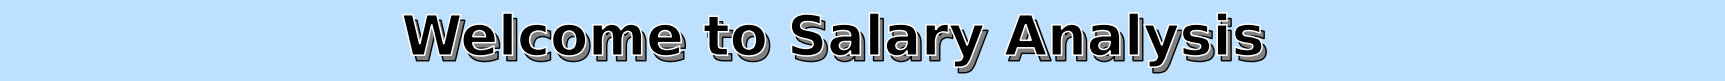

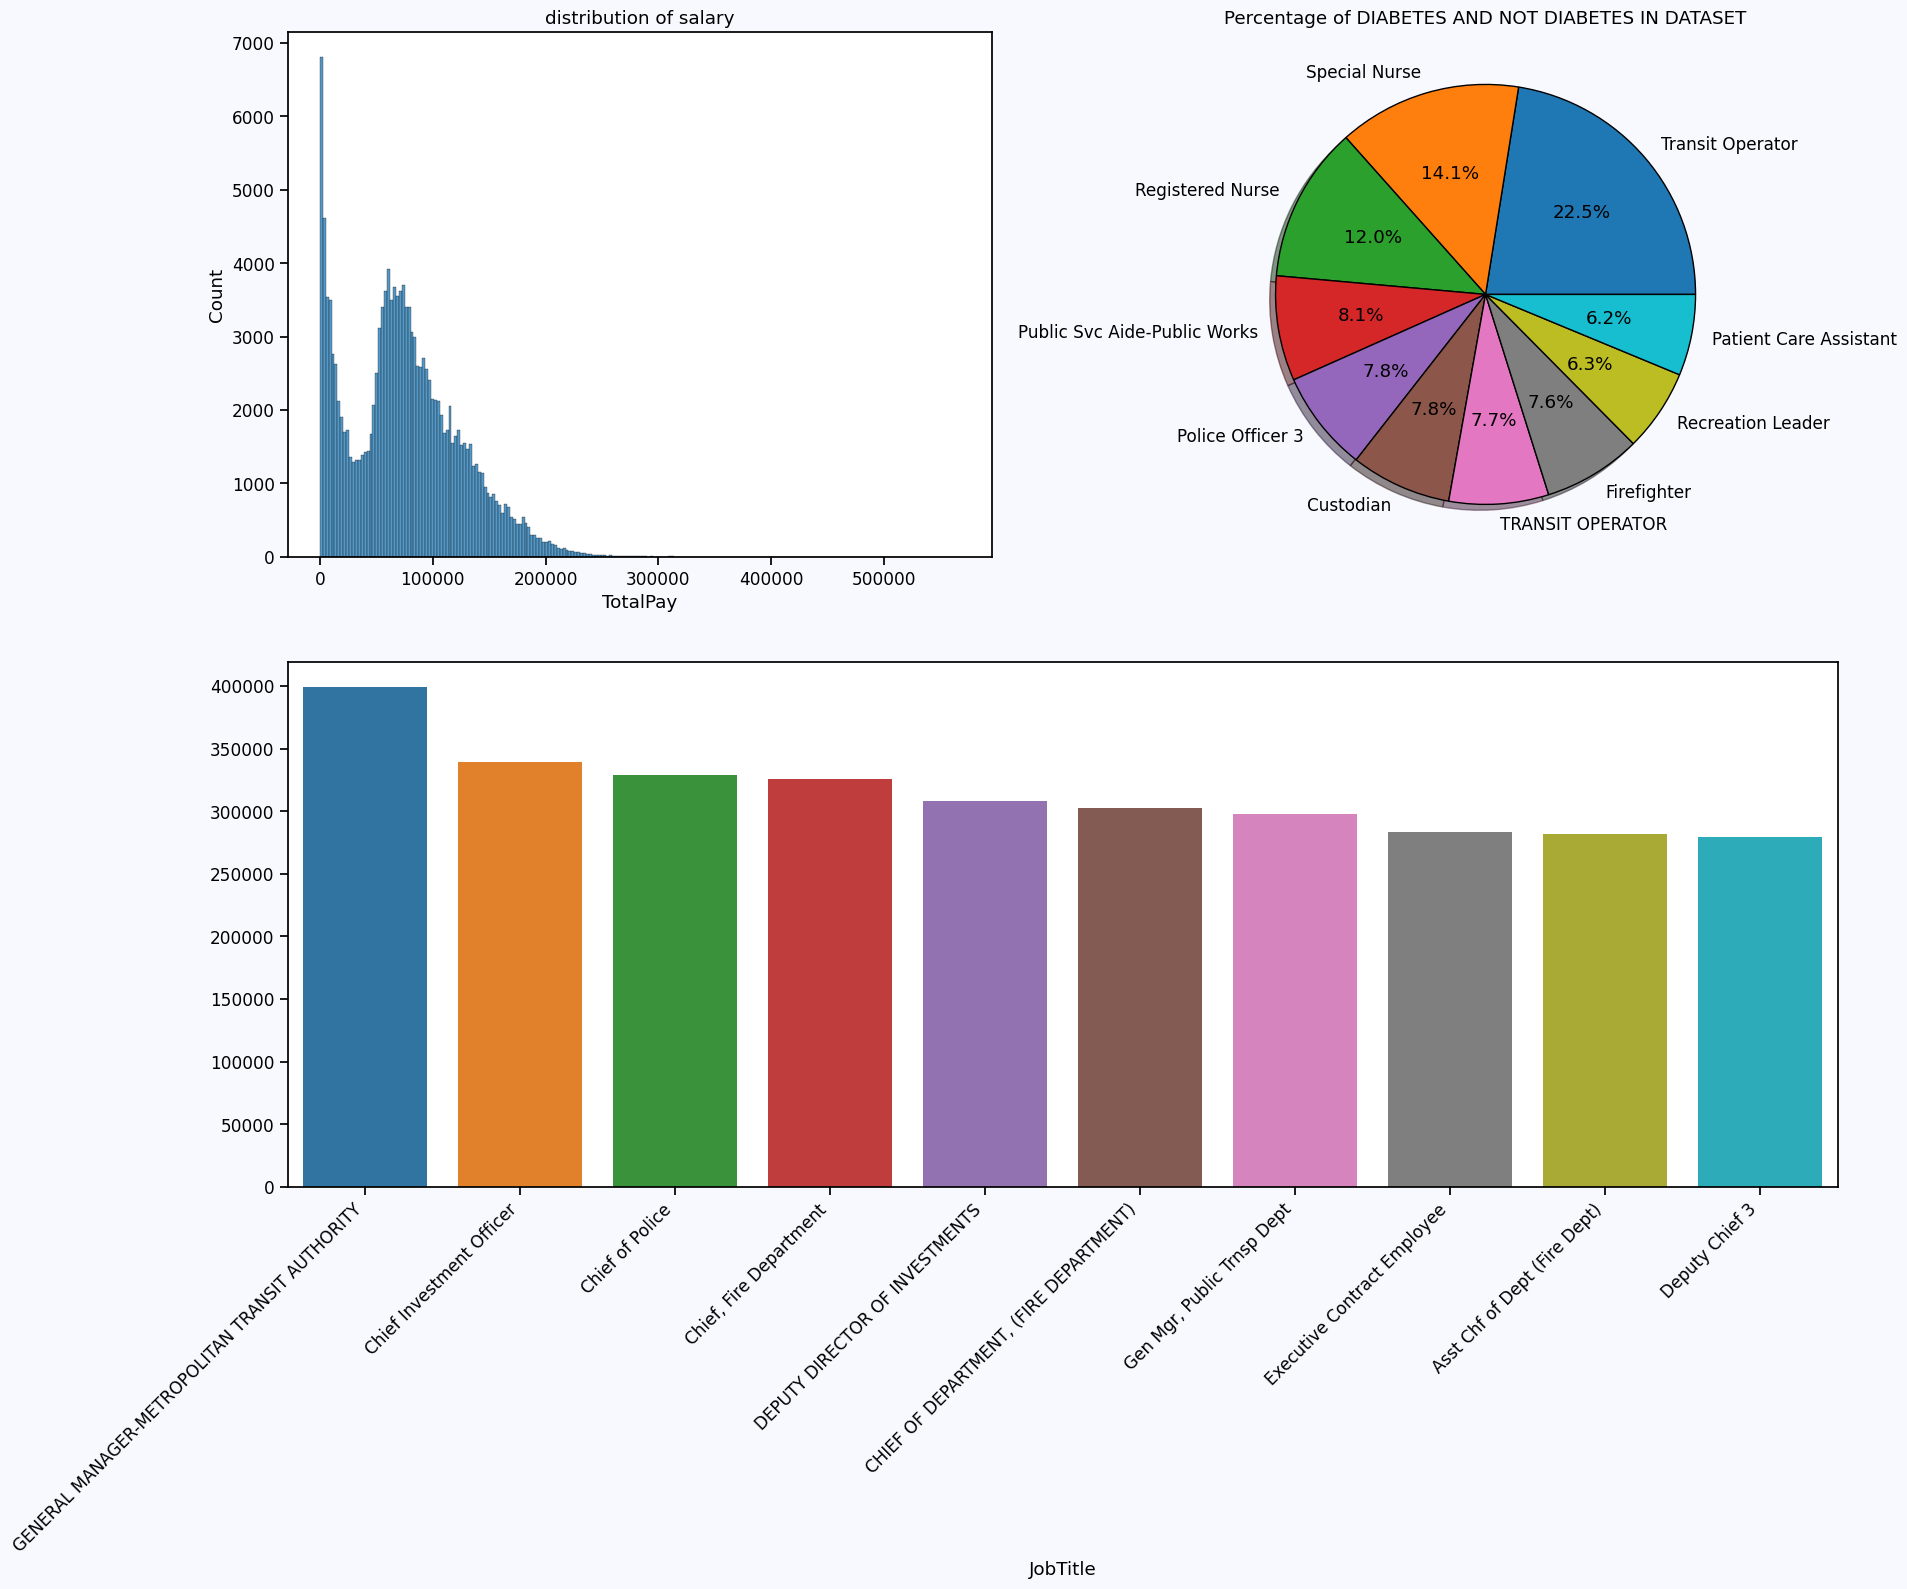

In [28]:
label_txt(f'       Welcome to Salary Analysis',w = 0.15)


fig, axes = plt.subplot_mosaic("Ac;DD",figsize = (20,15))

sns.set_context('notebook',font_scale= 1.1)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'


axes['c'].pie(df['JobTitle'].value_counts().values[:10], labels=df['JobTitle'].value_counts().index[:10],
        shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})

axes['c'].set_title("Percentage of DIABETES AND NOT DIABETES IN DATASET")


g = sns.histplot(x  = df["TotalPay"], ax = axes['A'])
axes['A'].set_title('distribution of salary')



g = sns.barplot(x = df.groupby(["JobTitle"])["TotalPay"].mean().sort_values(ascending = False).index[:10] , y = df.groupby(["JobTitle"])["TotalPay"].mean().sort_values(ascending = False).values[:10],ax = axes['D'])

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.show()

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Grouped Analysis</span>
 <a id="loading"></a>

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups

In [32]:
df.groupby(["JobTitle", "Year"])[["BasePay" , "OvertimePay" , "OtherPay" , "Benefits" , "TotalPay" , "TotalPayBenefits"]].mean()

BasePay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  43300.806506   
ACCOUNTANT                                     2011  46643.172000   
ACCOUNTANT INTERN                              2011  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  66374.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  52609.910000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  33174.840000   
                                               2014  32417.420000   
ZOO CURATOR                                    2011  43148.000000   

                                                     OvertimePay  \
JobTitle                                       Year                
ACCOUNT CLERK                                  2011   373.200843   
ACCOUNTANT                                     2011     0.000000   
ACCOUNTANT INTERN                              2011    24.430625   
ACPO,JuvP, Juv Prob (SFERS)                    2014     0.000000   
ACUPUNCTURIST                                  2011     0.000000   
...                                                          ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011     0.000000   
Youth Comm Advisor                             2012     0.000000   
                                               2013     0.000000   
                                               2014     0.000000   
ZOO CURATOR                                    2011     0.000000   

                                                         OtherPay   Benefits  \
JobTitle                                       Year                            
ACCOUNT CLERK                                  2011    361.656988      0.000   
ACCOUNTANT                                     2011    786.096000      0.000   
ACCOUNTANT INTERN                              2011    274.648333      0.000   
ACPO,JuvP, Juv Prob (SFERS)                    2014      0.000000  17975.590   
ACUPUNCTURIST                                  2011   1220.000000      0.000   
...                                                           ...        ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011   1022.960000      0.000   
Youth Comm Advisor                             2012      0.000000  28229.660   
                                               2013   2648.455000  15521.015   
                                               2014   4048.490000  15545.280   
ZOO CURATOR                                    2011  23538.560000      0.000   

                                                         TotalPay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  44035.664337   
ACCOUNTANT                                     2011  47429.268000   
ACCOUNTANT INTERN                              2011  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  67594.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  53632.870000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  35823.295000   
                                               2014  36465.910000   
ZOO CURATOR                                    2011  66686.560000   

                                                     TotalPayBenefits  
JobTitle                                       Year                    
ACCOUNT CLERK                                  2011      44035.664337  
ACCOUNTANT                                     2011      47429.268000  
ACCOUNTANT INTERN                              2

In [33]:
df.groupby(["JobTitle", "Year"])[["BasePay" , "OvertimePay" , "OtherPay" , "Benefits" , "TotalPay" , "TotalPayBenefits"]].mean()

BasePay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  43300.806506   
ACCOUNTANT                                     2011  46643.172000   
ACCOUNTANT INTERN                              2011  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  66374.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  52609.910000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  33174.840000   
                                               2014  32417.420000   
ZOO CURATOR                                    2011  43148.000000   

                                                     OvertimePay  \
JobTitle                                       Year                
ACCOUNT CLERK                                  2011   373.200843   
ACCOUNTANT                                     2011     0.000000   
ACCOUNTANT INTERN                              2011    24.430625   
ACPO,JuvP, Juv Prob (SFERS)                    2014     0.000000   
ACUPUNCTURIST                                  2011     0.000000   
...                                                          ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011     0.000000   
Youth Comm Advisor                             2012     0.000000   
                                               2013     0.000000   
                                               2014     0.000000   
ZOO CURATOR                                    2011     0.000000   

                                                         OtherPay   Benefits  \
JobTitle                                       Year                            
ACCOUNT CLERK                                  2011    361.656988      0.000   
ACCOUNTANT                                     2011    786.096000      0.000   
ACCOUNTANT INTERN                              2011    274.648333      0.000   
ACPO,JuvP, Juv Prob (SFERS)                    2014      0.000000  17975.590   
ACUPUNCTURIST                                  2011   1220.000000      0.000   
...                                                           ...        ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011   1022.960000      0.000   
Youth Comm Advisor                             2012      0.000000  28229.660   
                                               2013   2648.455000  15521.015   
                                               2014   4048.490000  15545.280   
ZOO CURATOR                                    2011  23538.560000      0.000   

                                                         TotalPay  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  44035.664337   
ACCOUNTANT                                     2011  47429.268000   
ACCOUNTANT INTERN                              2011  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  67594.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  53632.870000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  35823.295000   
                                               2014  36465.910000   
ZOO CURATOR                                    2011  66686.560000   

                                                     TotalPayBenefits  
JobTitle                                       Year                    
ACCOUNT CLERK                                  2011      44035.664337  
ACCOUNTANT                                     2011      47429.268000  
ACCOUNTANT INTERN                              2

In [35]:
import numpy as np

# Define the aggregation functions
aggregations = {
    "BasePay": ["max", "mean", "min", np.std],
    "OvertimePay": ["max", "mean", "min", np.std],
    "OtherPay": ["max", "mean", "min", np.std],
    "Benefits": ["max", "mean", "min", np.std],
    "TotalPay": ["max", "mean", "min", np.std],
    "TotalPayBenefits": ["max", "mean", "min", np.std]
}

# Apply the aggregations
result = df.groupby(["JobTitle", "Year"]).agg(aggregations)

# Flatten the multi-level column index
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Print the result
result


BasePay_max  \
JobTitle                                       Year                
ACCOUNT CLERK                                  2011     60838.20   
ACCOUNTANT                                     2011     65392.01   
ACCOUNTANT INTERN                              2011     58501.72   
ACPO,JuvP, Juv Prob (SFERS)                    2014     62290.78   
ACUPUNCTURIST                                  2011     66374.40   
...                                                          ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011     52609.91   
Youth Comm Advisor                             2012     57544.73   
                                               2013     52433.88   
                                               2014     32417.42   
ZOO CURATOR                                    2011     43148.00   

                                                     BasePay_mean  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  43300.806506   
ACCOUNTANT                                     2011  46643.172000   
ACCOUNTANT INTERN                              2011  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                    2014  62290.780000   
ACUPUNCTURIST                                  2011  66374.400000   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011  52609.910000   
Youth Comm Advisor                             2012  57544.730000   
                                               2013  33174.840000   
                                               2014  32417.420000   
ZOO CURATOR                                    2011  43148.000000   

                                                     BasePay_min  \
JobTitle                                       Year                
ACCOUNT CLERK                                  2011       614.00   
ACCOUNTANT                                     2011         0.00   
ACCOUNTANT INTERN                              2011      2981.53   
ACPO,JuvP, Juv Prob (SFERS)                    2014     62290.78   
ACUPUNCTURIST                                  2011     66374.40   
...                                                          ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011     52609.91   
Youth Comm Advisor                             2012     57544.73   
                                               2013     13915.80   
                                               2014     32417.42   
ZOO CURATOR                                    2011     43148.00   

                                                      BasePay_std  \
JobTitle                                       Year                 
ACCOUNT CLERK                                  2011  12890.631740   
ACCOUNTANT                                     2011  27703.019579   
ACCOUNTANT INTERN                              2011  20635.668379   
ACPO,JuvP, Juv Prob (SFERS)                    2014           NaN   
ACUPUNCTURIST                                  2011           NaN   
...                                                           ...   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS 2011           NaN   
Youth Comm Advisor                             2012           NaN   
                                               2013  27236.395566   
                                               2014           NaN   
ZOO CURATOR                                    2011           NaN   

                                                     OvertimePay_max  \
JobTitle                                       Year                    
ACCOUNT CLERK                                  2011         10753.06   
ACCOUNTANT                                     2011             0.00   
ACCOUNTANT INTERN                              2011           624.84   
ACPO,JuvP, Juv Prob (SFERS)                    2014             0.00   
ACUPUNCTURIST                                  2011    

In [36]:
import numpy as np

# Define the aggregation functions
aggregations = {
    "BasePay": ["max", "mean", "min", np.std],
    "OvertimePay": ["max", "mean", "min", np.std],
    "OtherPay": ["max", "mean", "min", np.std],
    "Benefits": ["max", "mean", "min", np.std],
    "TotalPay": ["max", "mean", "min", np.std],
    "TotalPayBenefits": ["max", "mean", "min", np.std]
}

# Apply the aggregations
result = df.groupby(["JobTitle", "Year"]).agg(aggregations)

# Transpose the DataFrame to display columns as rows
result_transposed = result.T

# Print the transposed result
result_transposed

JobTitle              ACCOUNT CLERK    ACCOUNTANT ACCOUNTANT INTERN  \
Year                           2011          2011              2011   
BasePay          max   60838.200000  65392.010000      58501.720000   
                 mean  43300.806506  46643.172000      28732.663958   
                 min     614.000000      0.000000       2981.530000   
                 std   12890.631740  27703.019579      20635.668379   
OvertimePay      max   10753.060000      0.000000        624.840000   
                 mean    373.200843      0.000000         24.430625   
                 min       0.000000      0.000000          0.000000   
                 std    1400.408714      0.000000        118.671160   
OtherPay         max    3370.130000   2782.080000       3069.190000   
                 mean    361.656988    786.096000        274.648333   
                 min       0.000000      0.000000          0.000000   
                 std     576.172993   1221.582691        788.004565   
Benefits         max       0.000000      0.000000          0.000000   
                 mean      0.000000      0.000000          0.000000   
                 min       0.000000      0.000000          0.000000   
                 std       0.000000      0.000000          0.000000   
TotalPay         max   60838.200000  65392.010000      58799.530000   
                 mean  44035.664337  47429.268000      29031.742917   
                 min     614.000000   1148.400000       2981.530000   
                 std   13170.742908  27137.331315      20711.322649   
TotalPayBenefits max   60838.200000  65392.010000      58799.530000   
                 mean  44035.664337  47429.268000      29031.742917   
                 min     614.000000   1148.400000       2981.530000   
                 std   13170.742908  27137.331315      20711.322649   

JobTitle              ACPO,JuvP, Juv Prob (SFERS) ACUPUNCTURIST  \
Year                                         2014          2011   
BasePay          max                     62290.78       66374.4   
                 mean                    62290.78       66374.4   
                 min                     62290.78       66374.4   
                 std                          NaN           NaN   
OvertimePay      max                         0.00           0.0   
                 mean                        0.00           0.0   
                 min                         0.00           0.0   
                 std                          NaN           NaN   
OtherPay         max                         0.00        1220.0   
                 mean                        0.00        1220.0   
                 min                         0.00        1220.0   
                 std                          NaN           NaN   
Benefits         max                     17975.59           0.0   
                 mean                    17975.59           0.0   
                 min                     17975.59           0.0   
                 std                          NaN           NaN   
TotalPay         max                     62290.78       67594.4   
                 mean                    62290.78       67594.4   
                 min                     62290.78       67594.4   
                 std                          NaN           NaN   
TotalPayBenefits max                     80266.37       67594.4   
                 mean                    80266.37       67594.4   
                 min                     80266.37       67594.4   
                 std                          NaN           NaN   

JobTitle              ADMINISTRATIVE ANALYST ADMINISTRATIVE ANALYST II  \
Year                                    2011                      2011   
BasePay          max            78587.890000              75585.820000   
                 mean           63435.628602              59373.710000   
                 min                0.000000              43161.600000   
                 std            19079.51

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Simple Correlation Analysis</span>
 <a id="loading"></a>

<p>Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.</p>

<Axes: >

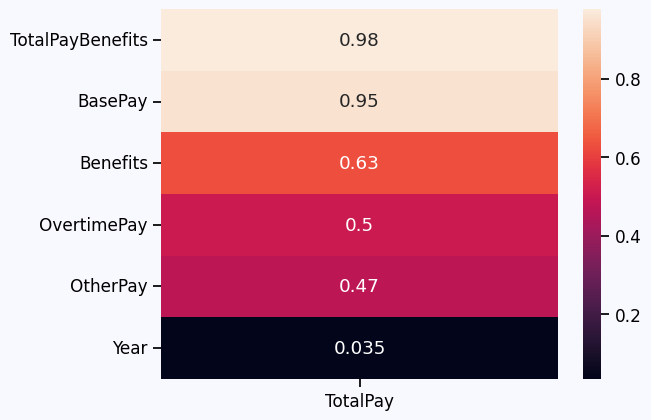

In [40]:
sns.heatmap(df.select_dtypes(include=np.number).corr()['TotalPay'].drop('TotalPay').sort_values(ascending=False).to_frame(),annot = True)


In [42]:
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148621,Kenneth Mackey,Transit Operator,0.00,0.00,15.35,0.00,15.35,15.35,2014
148622,Jacqueline Hubbard,Senior Clerk,0.00,0.00,13.77,0.00,13.77,13.77,2014
148623,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.13,13.35,13.48,2014
148624,Lorraine Rosenthal,Senior Clerk,0.00,0.00,12.89,0.00,12.89,12.89,2014


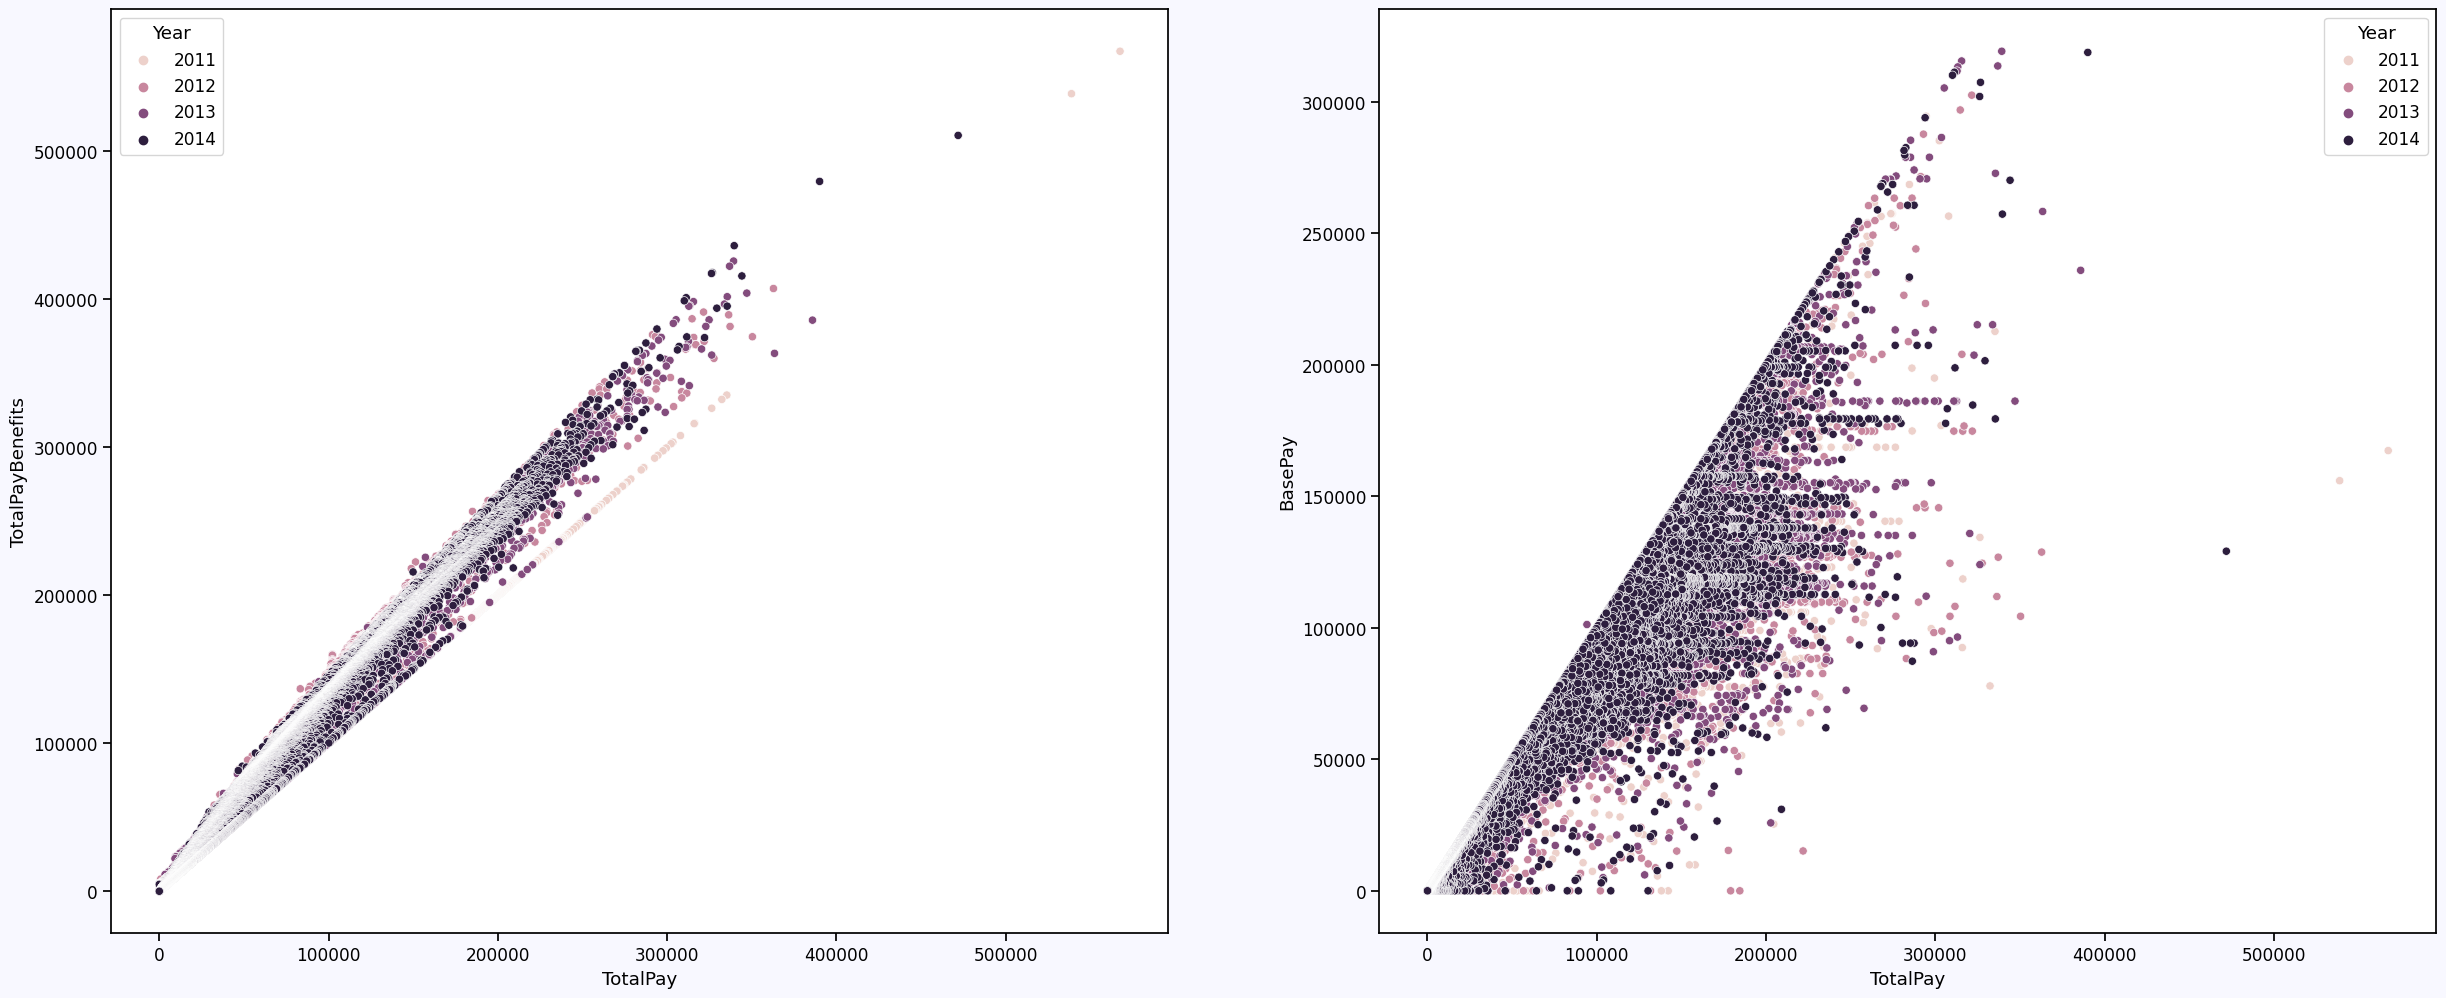

<Axes: xlabel='TotalPay', ylabel='OvertimePay'>

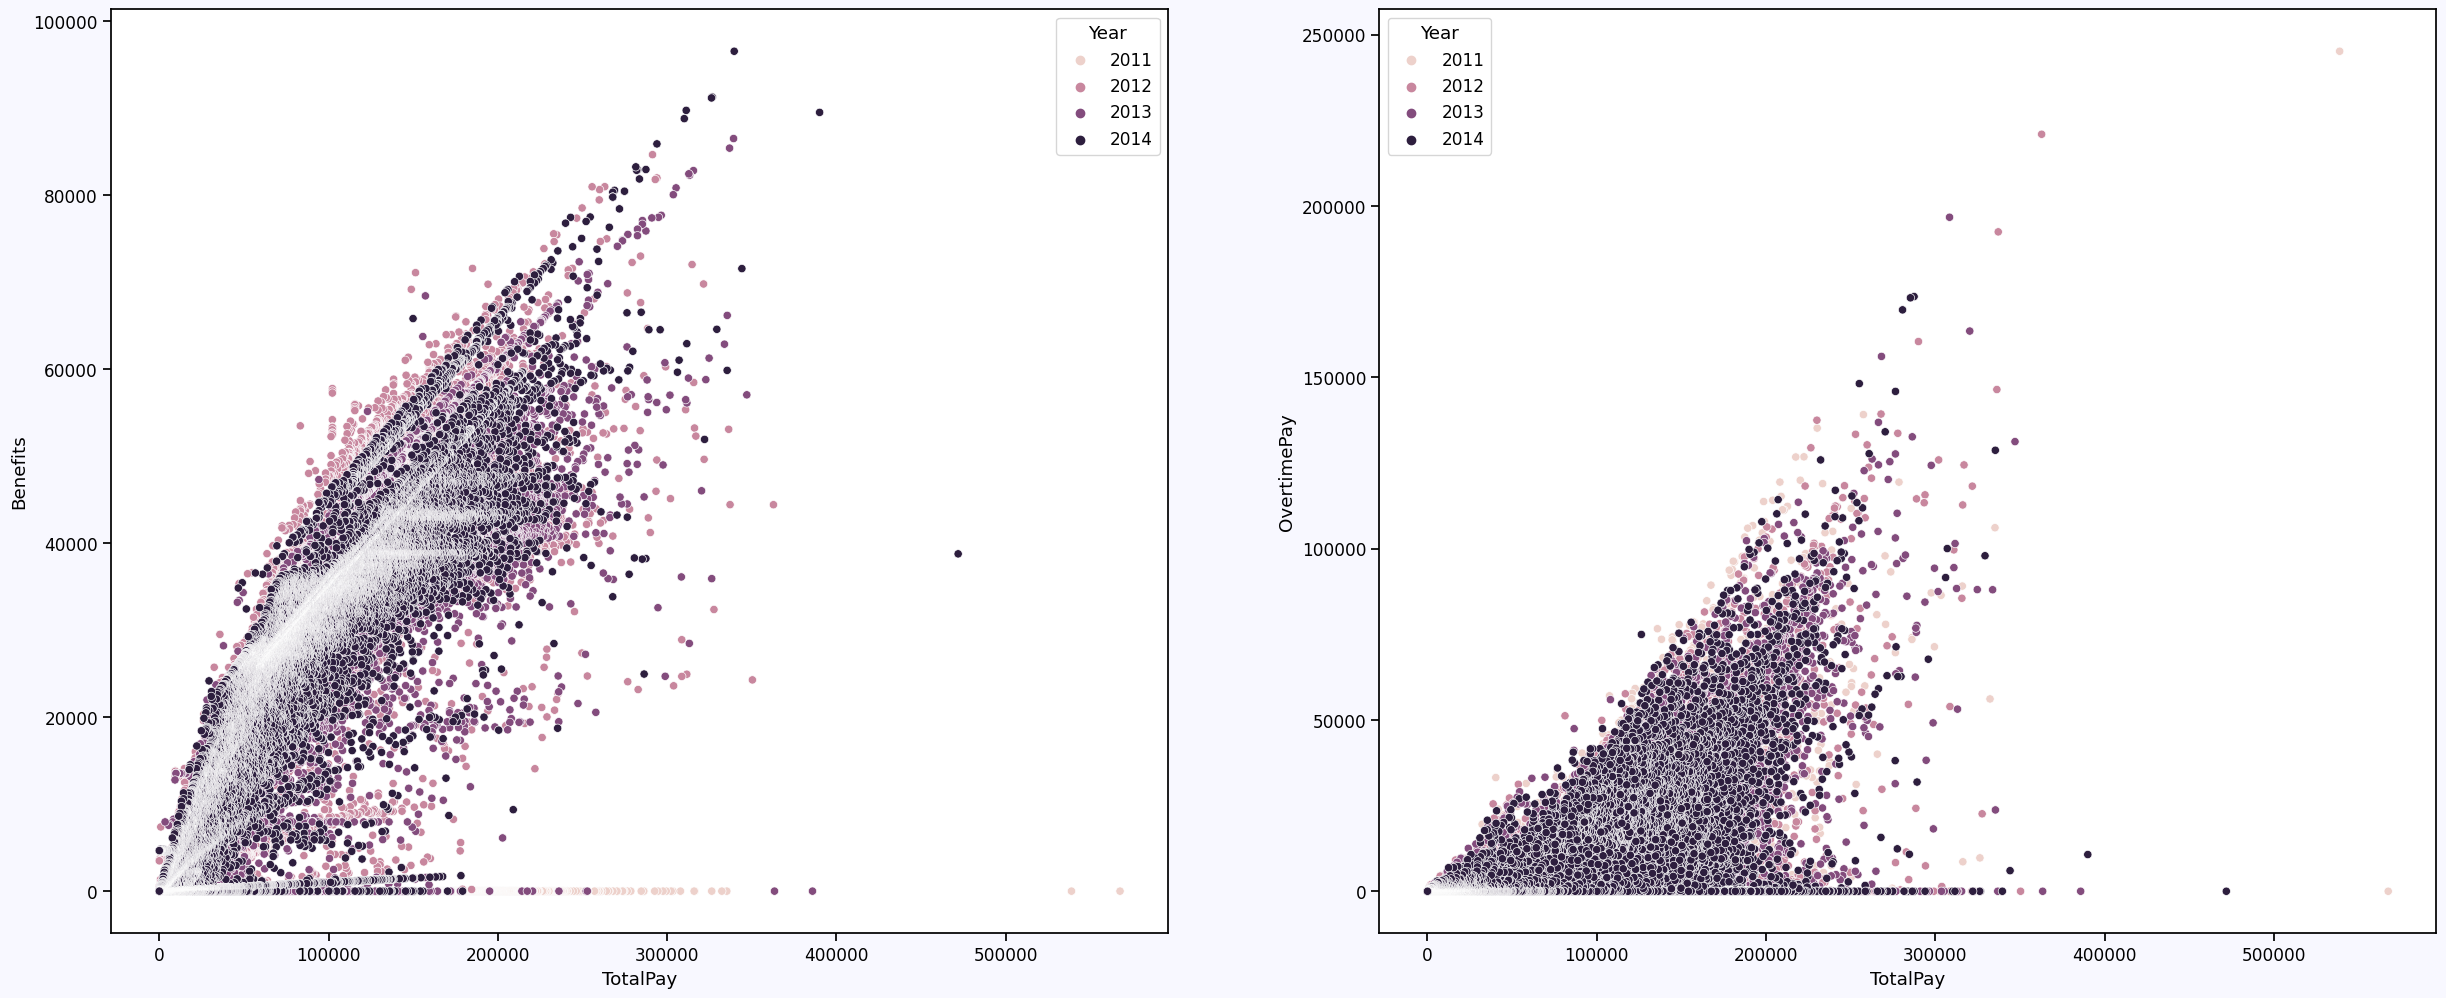

In [45]:
fig, axes = plt.subplots(1,2,figsize = (30,12))

sns.scatterplot(x = "TotalPay" , y = "TotalPayBenefits",data = df,hue  = "Year" ,ax = axes[0])
sns.scatterplot(x = "TotalPay" , y = "BasePay",data = df,hue  = "Year" ,ax = axes[1])
plt.show()


fig, axes = plt.subplots(1,2,figsize = (30,12))

sns.scatterplot(x = "TotalPay" , y = "Benefits",data = df,hue  = "Year" ,ax = axes[0])
sns.scatterplot(x = "TotalPay" , y = "OvertimePay",data = df,hue  = "Year" ,ax = axes[1])



<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Summary of Insights</span>
 <a id="loading"></a>

<p>Write a brief report summarizing the findings and insights from the analyses.</p>

# Summary Report on Salary Analysis

## Dataset Overview:
- The dataset contains information about employee salaries in San Francisco.
- There are 148,654 rows and 10 columns in the dataset after removing irrelevant columns.
- The dataset consists of various data types, including integers, floats, and objects.
- Missing values are present in columns such as BasePay, OvertimePay, OtherPay, and Benefits.

## Data Cleaning:
- Removed irrelevant columns like "Notes" and "Status" as they contained only null values.
- Filtered out rows with missing or zero values in important columns like "BasePay", "TotalPay", and "TotalPayBenefits".
- Filled missing values in "BasePay" and "Benefits" columns with mean values grouped by "JobTitle" and "Year".

## Descriptive Statistics:
- The mean salary is $74,768.32, with a minimum of -$618.13 and a maximum of $567,595.43.
- The median salary is $71,426.61.
- The range of salary is $568,213.56.
- The most common job titles are "Transit Operator", "Special Nurse", and "Registered Nurse".
- The top three job titles with the highest mean total pay are "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY", "Chief Investment Officer", and "Chief of Police".

## Data Visualization:
- A pie chart represents the percentage distribution of the top ten job titles.
- A histogram displays the distribution of salaries.
- A bar plot illustrates the mean total pay for the top ten job titles, with rotated labels for better readability.
- Heatmap shows the correlation between different salary-related variables, indicating a strong positive correlation between "TotalPay" and "TotalPayBenefits".




# Good Luck!